In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [9]:
# reflect an existing database into a new model

#declare a base
Base = automap_base() 


# reflect the tables
#Use the Base class to reflect the database tables 
Base.prepare(engine, reflect=True) 


In [10]:
# View all of the classes that automap found
Base.classes.keys() 


['measurement', 'station']

In [11]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
#explore database
inspector = inspect(engine)
inspector.get_table_names()

#get a list of column names and types for measurement class
columns = inspector.get_columns('measurement')
for c in columns: 
        print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
#get a list of column names and types for station class
columns = inspector.get_columns('station')
for c in columns: 
        print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [23]:
#Find the most recent date in the data set based on 'date' column
#find first date then reverse order
session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23')

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) + dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores - prcp
#past 12 months from ('2017-08-23')
climate_dates = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
climate_dates_df = pd.DataFrame(climate_dates, columns=['Date', 'PRCP'])

#set the index to the date column
climate_dates_df.set_index('Date', inplace= True)


# Sort the dataframe by date
climate_dates_df.sort_values(by= 'Date', ascending= True)


Query Date:  2018-08-23


,PRCP
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


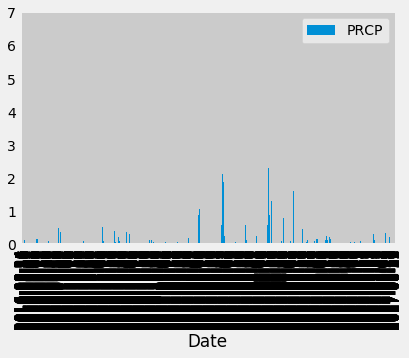

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
##****NEED TO FORMAT PLOT CORRECTLY***##


y = np.array(['Date'])
x = np.array(['PRCP'])

climate_dates_df.plot.bar()
plt.show()



In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
climate_dates_df.describe()

,PRCP
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.id)).all() 

[(9)]

In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations= session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#use the func max, min etc
USC00519281_data = 




In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

USC00519281_df= pd.DataFrame(USC00519281_data)
USC00519281_df.plot(kind="hist",bins=12);
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.savefig("Images/Histochart.png")
plt.show()



NameError: name 'USC00519281_data' is not defined

# Close session

In [ ]:
# Close Session
session.close()